In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec as gs
width = matplotlib.rcParams["figure.figsize"][0]
height = matplotlib.rcParams["figure.figsize"][1]
import PIL
import archivedb
import datetime
import time

In [2]:
archivedb

<module 'archivedb' from 'archivedb/__init__.pyc'>

In [3]:
intervals = archivedb.get_time_intervals("Test/raw/W7X/QTB/ADQ14DC_SPD-04381_DATASTREAM/0/channel_0", 1457431564197103981, "2016-03-08 10:10:00", maxIntervals=10)

In [4]:
intervals

array([[1457431565097103981, 1457431565097105980],
       [1457431564997103981, 1457431564997105980],
       [1457431564897103981, 1457431564897105980],
       [1457431564797103981, 1457431564797105980],
       [1457431564697103981, 1457431564697105980],
       [1457431564597103981, 1457431564597105980],
       [1457431564497103981, 1457431564497105980],
       [1457431564397103981, 1457431564397105980],
       [1457431564297103981, 1457431564297105980],
       [1457431564197103981, 1457431564197105980]])

In [5]:
t, s= archivedb.get_signal("Test/raw/W7X/QTB/ADQ14DC_SPD-04381_DATASTREAM/0", 1457431565097103981, 1457431565097105980)

In [6]:
print(t.shape, s.shape)

((2000,), (2000,))


In [7]:
t, s= archivedb.get_signal_box("Test/raw/W7X/QTB/ADQ14DC_SPD-04381_DATASTREAM", 1457431565097103981, 1457431565097105980, [0,1], useCache=0)

In [8]:
print(t.shape, s.shape)

((2000,), (2, 2000))


In [9]:
t, s= archivedb.get_signal_box_multiinterval("Test/raw/W7X/QTB/ADQ14DC_SPD-04381_DATASTREAM", intervals, [0,1])

In [10]:
print(t.shape, s.shape)

((20000,), (2, 20000))


In [11]:
t, s= archivedb.get_signal_multiinterval("Test/raw/W7X/QTB/ADQ14DC_SPD-04381_DATASTREAM/0/channel_0", intervals)

In [12]:
print(t.shape, s.shape)

((20000,), (20000,))


In [13]:
t,s = archivedb.get_signal_for_program("Test/raw/W7X/QTB/ADQ14DC_SPD-04381_DATASTREAM/0/channel_0", "20160310.007")

In [14]:
print(t.shape, s.shape)

((194000,), (194000,))


<IPython.core.display.Javascript object>


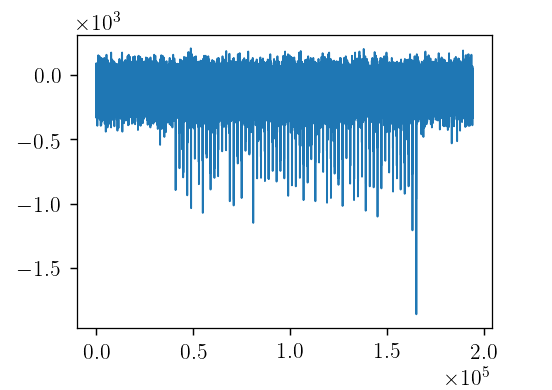

In [15]:
plt.close("all")
plt.plot(s.T)

In [35]:
t,s = archivedb.get_signal_for_program("Test/raw/W7X/QTB/ADQ14DC_SPD-04381_DATASTREAM/0/channel_0", "20120310.007")

{ "programs" : [ ] }


In [16]:
t, d = archivedb.get_image_png('Test/raw/Data4SoftwareTest/Hdf5.video.Test2/pixelfly_DATASTREAM',1421229109876999999,1421229109967000000)

In [17]:
print(d.shape)

(1392, 1024)


In [18]:
t, d =  archivedb.get_image_json('ArchiveDB/raw/W7X/QSR_Limiter_NIR/AEF10_A_Port_DATASTREAM',"2016-03-10 15:00:29.9", "2016-03-10 15:00:30")

In [19]:
print(d.shape)

(5, 288, 720)


In [20]:
t, d =  archivedb.get_image_png_multiple('ArchiveDB/raw/W7X/QSR_Limiter_NIR/AEF10_A_Port_DATASTREAM',"2016-03-10 15:00:29.9", "2016-03-10 15:00:30")

In [21]:
print(d.shape)

(5, 288, 720)


In [22]:
archivedb.get_parameters_box("ArchiveDB/raw/W7X/CoDaStationDesc.14823/DataModuleDesc.14833_PARLOG", 1438604887140000000,1438604887240000000)

{u'dimensions': [1438604887140000000, 1439539695409999999],
 u'label': u'parms',
 u'values': [{u'_source_class_name_': u'de.mpg.ipp.codac.business.schema.ParamSetFlexibleDataModule',
   u'chanDescs': {u'[0]': {u'_source_class_name_': u'de.mpg.ipp.codac.business.schema.ChannelDesc',
     u'active': 1,
     u'name': u'image',
     u'physicalQuantity': {u'_source_class_name_': u'de.mpg.ipp.codac.business.schema.InputRange',
      u'from': -10.0,
      u'type': u'V',
      u'upto': 10.0}}},
   u'className': u'ParamSetFlexibleDataModule',
   u'dataBoxElementLength': 1,
   u'dataBoxSize': 1,
   u'details': {u'[0]': {u'_source_class_name_': u'de.mpg.ipp.codac.business.schema.segment.ParameterString',
     u'actValue': u'image',
     u'id': 0,
     u'name': u'signalProviderSpecifier'},
    u'[1]': {u'_source_class_name_': u'de.mpg.ipp.codac.business.schema.segment.ParameterString',
     u'actValue': u'control',
     u'id': 0,
     u'name': u'controllableSpecifier'},
    u'[2]': {u'_source_clas

<IPython.core.display.Javascript object>


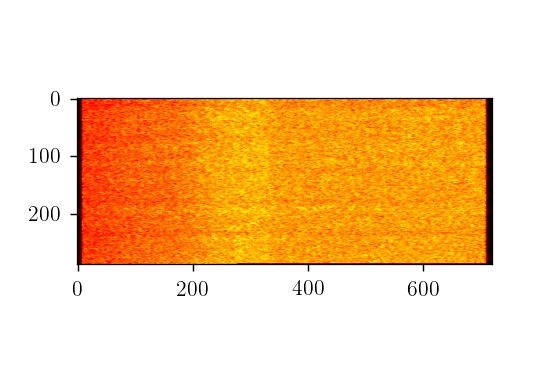

In [23]:
plt.close("all")
plt.imshow(d[2])

In [24]:
my_timestamp = int(round(time.time() * 1000)) * 1000000
timestamps=[my_timestamp, my_timestamp+1, my_timestamp+2,my_timestamp+3,my_timestamp+4]
archivedb.write_signal('Test/raw/W7XAnalysis/webapi-tests/pythonTest1_DATASTREAM/',
                    timestamps, [[11,2,3,4,15],[22,24,23,44,215]])    

True

In [25]:
archivedb.get_latest_time_interval("Test/raw/W7X/QTB/ADQ14DC_SPD-04381_DATASTREAM/0/channel_0")

array([1457642948799554801, 1457642948799556800])

In [26]:
archivedb.print_info()


    A set of functions to work with W7-X Archivedb via web-api.

    Simple function to read from and to write to the database are available.
    This includes reading/writing arrays, images. Also reading of
    performed programs is available.

    The original implementation is by Dinesh Kanan. Small corrections
    and modifications are by S.A. Bozhenkov.

Version: 0.2.2
Author: dsk
Cache path: /home/boz/.archivedb/cache/
DB URL: http://archive-webapi.ipp-hgw.mpg.de/
MDSPlus: http://10.44.4.11/operator/find_pulse/


In [27]:
archivedb.to_timestamp("2016-03-10 12:00:00"), archivedb.to_timestamp("2016-03-10 12:00:00.1213")

(1457611200000000000, 1457611200121300000)

In [28]:
archivedb.get_program_list_for_day("2016-03-10")[0]

{u'description': u'combined trigger dry run for diagnostics and GasInlet test puff\nH2 Puff_20ms at BG35\nH2 Puff 20ms at BG23\nECRH off',
 u'from': 1457599965437656661,
 u'id': u'20160310.001',
 u'name': u'#24988 W7-X_combined_StandardTriggerTest_and_GasInletTestPulseH2_BG35&23',
 u'scenarios': [{u'from': 1457599965437656661,
   u'id': 1,
   u'name': u'W7-X_Preparation',
   u'upto': 1457600021437656660},
  {u'from': 1457600021437656661,
   u'id': 2,
   u'name': u'W7-X_Trigger and GasInlet Test',
   u'upto': 1457600028437656660},
  {u'from': 1457600028437656661,
   u'id': 3,
   u'name': u'W7-X_post_processing',
   u'upto': 1457600032437656660}],
 u'sessionInfo': u'',
 u'trigger': {u'0': [1457599966437656661],
  u'1': [1457600026437656661],
  u'2': [1457600021437656661],
  u'3': [1457600025937656661],
  u'4': [1457600026387656661],
  u'5': [1457600026432656661],
  u'6': [1457600031437656661]},
 u'upto': 1457600032437656660}

In [29]:
archivedb.get_program_id(1457599965437656661)

u'20160310.001'

In [30]:
archivedb.get_program_t0('20160310.001')

1457599966437656661

In [31]:
archivedb.get_program_from_to('20160310.001')

(1457599965437656661, 1457600032437656660)

In [32]:
archivedb.get_mdsplus_shot(1457599966437656661)

160310001

In [33]:
archivedb.to_stringdate(1457599966437656661)

'2016-03-10 08:52:46.437657'

In [34]:
print(len(archivedb.get_program_list("2016-03-10 00:00:01", "2016-03-10 23:59:59")))

40


In [37]:
d = { 'chanDescs': {
                                        '[0]':{
                                            'name' : 'Alpha', 
                                            'active' : 1, 
                                            'physicalQuantity' : { 'type' : 'X'}
                                        },
                                        '[1]' : 
                                        {
                                            'name' : 'Zeta', 
                                            'active' : 1, 
                                            'physicalQuantity' : { 'type' : 'X'}
                                        }
                                                 },
                       'powerLevel' : 100 } 
name = 'Test/raw/W7XAnalysis/webapi-tests/pythonTest1_PARLOG/'
t = int(round(time.time() * 1000)) * 1000000
archivedb.write_parameters(name, d, [t, -1])

True

In [ ]:
im = PIL.Image.open("/home/boz/docs/students/practicum/Dinesh_Kannan/w7x.jpg")
width, height = im.size
image = np.array(im.getdata()).reshape(height, width, 3).sum(axis=-1)
d =  {"projectName":"test data", "cameraType":"test data",
            "height" : 287,
            "width" : 380,
            "bitDepth" : 10,
            "dataBoxSize" : 1,
            "datatype" : "short",
            "unsigned" : 1}
        
archivedb.write_image_to_database("Test/raw/W7XAnalysis/HDF5_import_test/",archivedb.to_timestamp("2017-01-03 12:30:00"), image, d)   

/usr/local/lib/python2.7/dist-packages/tables-3.4.2-py2.7-linux-x86_64.egg/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '[0]'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
